In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi

In [48]:
def to_chebfun(xs, fs):
    
    # How many points?
    N = len(fs)
    
    # And the w_j function
    def w(j):
        if j == 0 or N:
            return (-1)**j/2
        else:
            return (-1)^j
        
    # Finally build the interpolating polynomial
    def p(x):
        numerator = 0
        denominator = 0
        
        for j in range(N):
            numerator += (w(j)/(x - xs[j]))*fs[j]
            denominator += (w(j)/(x - xs[j]))
            
        return numerator / denominator
    
    return p

In [50]:
FS = [-0.9240, -0.9438, -0.9612, -0.8614, -0.5158, 0.0811, 0.6965, 0.9631, 0.6965, 0.0811, -0.5158, -0.8614, -0.9612, -0.9438, -0.9240]
XS = [-1.0, -0.9749, -0.9010, -0.7818, -0.6235, -0.4339, -0.2225, 0, 0.2225, 0.43339, 0.6235, 0.7818, 0.9010, 0.9749, 1.0]
p = to_chebfun(XS, FS)


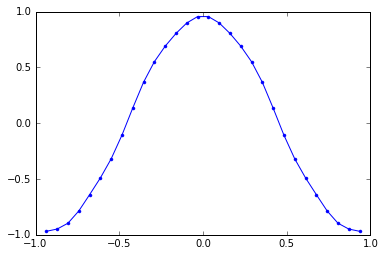

In [56]:
xs = np.linspace(-1,1,32)
ys = [p(x) for x in xs]
plt.plot(xs, ys, '.-')

(15, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [57]:
from numpy.polynomial.chebyshev import Chebyshev

In [58]:
coefs = [0, 0, 0, 0, -0.0001, 0, 0.0026, 0, -0.440, 0, 0.3720, 0, -0.8995, 0, -0.3550]
len(coefs)

15

In [59]:
p = Chebyshev(coefs)

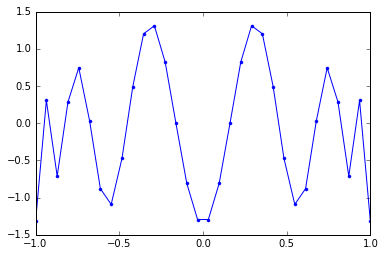

In [61]:
xs = np.linspace(-1,1,32)
ys = [p(x) for x in xs]
plt.plot(xs, ys, '.-')

In [62]:
from scipy.interpolate import BarycentricInterpolator

In [66]:
p = BarycentricInterpolator(XS, FS)

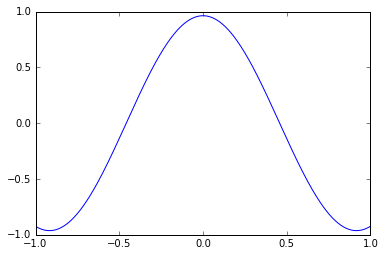

In [70]:
xs = np.linspace(-1,1,512)
ys = [float(p(x)) for x in xs]
plt.plot(xs, ys, '-')